In [44]:
import numpy as np
from random import seed
import copy, random
import time
import subprocess
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
%matplotlib inline


types = ["insertionsort.cpp", "mergesort.cpp",
         "qsort.cpp", "nlognqsort.cpp",
         "heapsort.cpp", "stringsort.cpp",
         "stringbinsearchsort.cpp", "skiplistsort.cpp"]

def run_sort(command, input_data):
    res = subprocess.run(command, input=input_data, text=True, stdout=subprocess.PIPE, shell=True)
    return res.stdout

In [2]:
# insertionsort_range range (1, 11000)
# mergesort_range range (1, 100100)
# qsort_range range (1, 100100)
# heapsort_range range (1, 100100)
# stringinsertion
# n in [10, 30, 80, 150, 400, 1500, 4000, 7000, 10000]
# m in [1, 5, 10, 20, 45, 75, 100, 150, 200]

# Подгрузка информации

In [45]:
insertionsort_data = []
with open("insertion.txt", "r") as f:
    for line in f.readlines():
        insertionsort_data += [float(line)]
f.close()

mergesort_data = []
with open("merge.txt", "r") as f:
    for line in f.readlines():
        mergesort_data += [float(line)]
f.close()

heapsort_data = []
with open("heap.txt", "r") as f:
    for line in f.readlines():
        heapsort_data += [float(line)]
f.close()

qsort_data = []
with open("quicksort.txt", "r") as f:
    for line in f.readlines():
        qsort_data += [float(line)]
f.close()

stringsort_data = []
with open("stringsort.txt", "r") as f:
    for line in f.readlines():
        stringsort_data += [float(line)]

stringbinsort_data = []
with open("stringbinsort.txt", "r") as f:
    for line in f.readlines():
        stringbinsort_data += [float(line)]

skiplistsort_data = []
with open("skiplist.txt", "r") as f:
    for line in f.readlines():
        skiplistsort_data += [float(line)]

In [63]:
# sort_type = 7
# compile_command = f"g++ {types[sort_type]} -o test"
# subprocess.run(compile_command, shell=True)
# exec_command  = "./test"
# for n in [10, 40, 150, 500, 1000, 2500, 5000, 7500, 10000,20000, 50000, 100000, 300000, 500000, 1000000]:
#     test = 0
#     for i in range(5):
#         input_data = str(n)
#         exec_time = run_sort(exec_command, input_data)
#         test += float(exec_time)
#     print(round(test / 5 , 8))


# Insertion Sort Graph

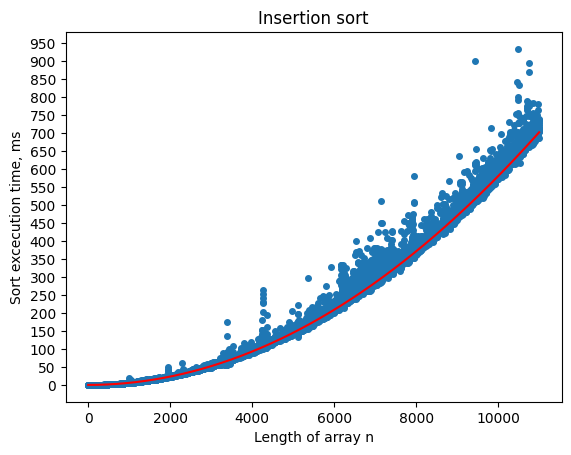

In [46]:
x = [n for n in range(1, 11000)]
y = [1000 * el for el in insertionsort_data]
x1 = np.arange(0, 11000, 0.1)
y1 = 5.8 * x1**2 / 1000000
plt.plot(x, y, marker='o', markersize=4, linestyle=' ')
plt.plot(x1, y1, color='red')
desired_y_ticks = 40
plt.locator_params(axis='y', nbins=desired_y_ticks)
plt.plot()
plt.title('Insertion sort')
plt.xlabel('Length of array n')
plt.ylabel('Sort excecution time, ms')
plt.show()

# Merge Sort Graph

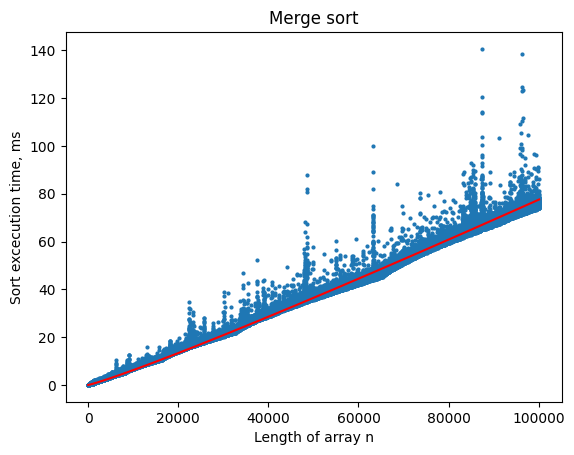

In [47]:
x = [n for n in range(1, 100100)]
y = [1000 * el for el in mergesort_data]
x1 = np.arange(1, 100100, 0.1)
y1 = x1 * np.log2(x1) / (2.15 * 1000 * np.log2(1000))
plt.plot(x, y, marker='o', markersize=2, linestyle=' ')
plt.plot(x1, y1, color='red')
desired_y_ticks = 10
plt.locator_params(axis='y', nbins=desired_y_ticks)
plt.plot()
plt.title('Merge sort')
plt.xlabel('Length of array n')
plt.ylabel('Sort excecution time, ms')
plt.show()

# Quick Sort Graph

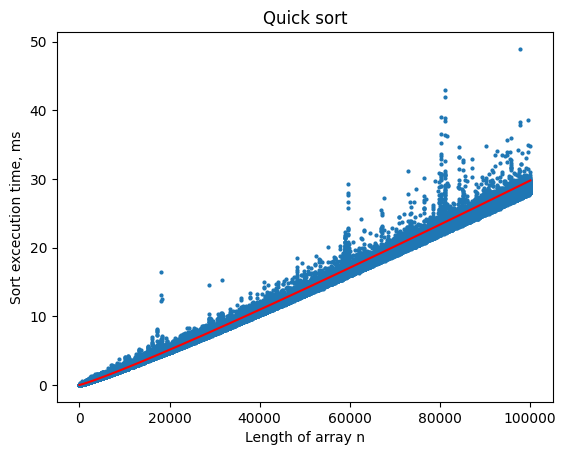

In [48]:
x = [n for n in range(1, 100100)]
y = [1000 * el for el in qsort_data]
x1 = np.arange(1, 100100, 0.1)
y1 = x1 * np.log2(x1) / (5.6 * 1000 * np.log2(1000))
plt.plot(x, y, marker='o', markersize=2, linestyle=' ')
plt.plot(x1, y1, color='red')
desired_y_ticks = 10
plt.locator_params(axis='y', nbins=desired_y_ticks)
plt.plot()
plt.title('Quick sort')
plt.xlabel('Length of array n')
plt.ylabel('Sort excecution time, ms')
plt.show()

# Heap Sort Graph

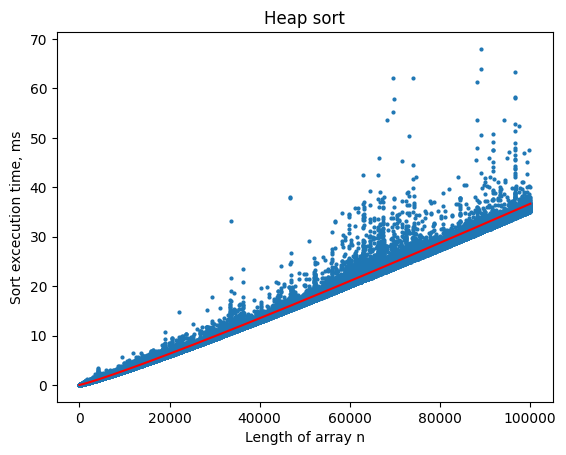

In [49]:
x = [n for n in range(1, 100100)]
y = [1000 * el for el in heapsort_data]
x1 = np.arange(1, 100100, 0.1)
y1 = x1 * np.log2(x1) / (4.55 * 1000 * np.log2(1000))
plt.plot(x, y, marker='o', markersize=2, linestyle=' ')
plt.plot(x1, y1, color='red')
desired_y_ticks = 10
plt.locator_params(axis='y', nbins=desired_y_ticks)
plt.plot()
plt.title('Heap sort')
plt.xlabel('Length of array n')
plt.ylabel('Sort excecution time, ms')
plt.show()

# Skip List Sort Graph

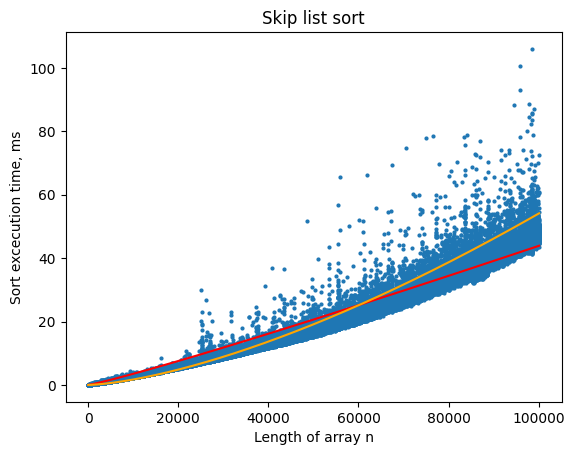

In [50]:
x = [n for n in range(1, 100100)]
y = [1000 * el for el in skiplistsort_data]
x1 = np.arange(1, 100100, 0.1)
y1 = x1 * np.log2(x1) / (3.8 * 1000 * np.log2(1000))
y2 = x1 * np.sqrt(x1) / (1000 * np.sqrt(1000) * 18.5)
plt.plot(x, y, marker='o', markersize=2, linestyle=' ')
plt.plot(x1, y1, color='red')
plt.plot(x1, y2, color='orange')
desired_y_ticks = 10
plt.locator_params(axis='y', nbins=desired_y_ticks)
plt.plot()
plt.title('Skip list sort')
plt.xlabel('Length of array n')
plt.ylabel('Sort excecution time, ms')
plt.show()

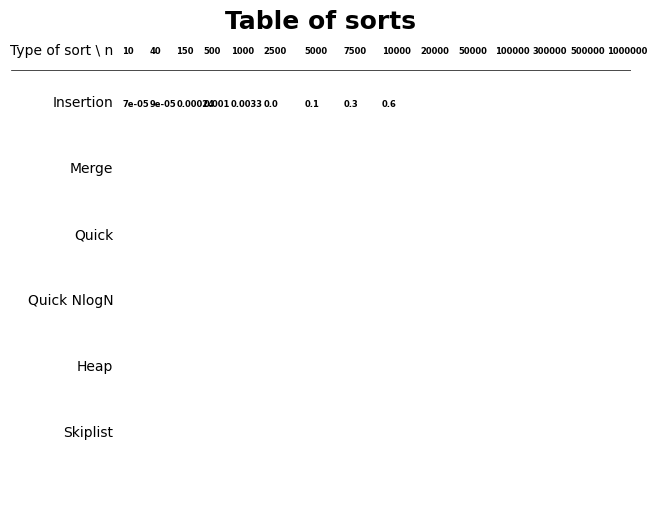

In [51]:
ntests = [10, 40, 150, 500, 1000, 2500, 5000, 7500, 10000, 20000, 50000, 100000, 300000, 500000, 1000000]
types_of_sorts = ["Insertion", "Merge", "Quick", "Quick NlogN", "Heap", "Skiplist"]
insertion_tests = [7.22E-05, 8.84E-05, 0.00024149496, 0.00099501276, 0.0033037284, 0.039370408, 0.14537212, 0.3192294, 0.5632538]
merge_tests = [2.49E-05, 0.0000715214, 0.0002340316, 0.0003368128, 0.0006374556, 0.0019489626, 0.0038576212, 0.0055058952,
               0.0070928256, 0.0143219446, 0.03725022, 0.074277916, 0.2362212912, 0.3938808, 0.8118994]
qsort_tests = [1.46E-05, 1.79E-05, 3.26E-05, 9.36E-05, 0.000245613, 0.0004876376, 0.001107584, 0.001837016,
               0.002602716, 0.004931068, 0.01380158, 0.02933614, 0.09639222, 0.163707, 0.360239]
qsort_nlogn_tests = []
heap_tests = [3.4733E-05, 2.07418E-05, 4.34616E-05, 0.000116561, 0.0002614382, 0.0007121566, 0.00135945,
              0.002287592, 0.002861662, 0.006280428, 0.01872828, 0.0391922, 0.1370568, 0.2346942, 0.5371392]
skiplist_tests = [3.394E-05, 4.33E-05, 0.00010098, 0.00023449, 0.00048765, 0.00112804, 0.00246293, 0.00390321,
              0.00566682, 0.01304138, 0.03227925, 0.08183625, 0.40933815, 0.88446923, 2.12028154]


fig, ax = plt.subplots(figsize=(8,6))
rows = 5
cols = 80
ax.set_ylim(-1, rows + 1)
ax.set_xlim(-17, cols + 6)
ax.set_title('Table of sorts', loc='center', fontsize=18, weight='bold')
ax.text(x=0, y=5.8, s='Type of sort \ n', va='center', ha='right')

for i in range(15):
  if i < 5: ax.text(1.5 + 4.5 * i, 5.75, ntests[i], weight='bold', ha='left', size=6, fontdict=None)
  else : ax.text(6 * i - 30 / (i + 1), 5.75, ntests[i], weight='bold', ha='left', size=6, fontdict=None)
for i in range(9):
  if i < 5: ax.text(1.5 + 4.5 * i, 4.95, round(insertion_tests[i], 5), weight='bold', ha='left', size=6, fontdict=None)
  else : ax.text(6 * i - 30 / (i + 1), 4.95, round(insertion_tests[i], 1), weight='bold', ha='left', size=6, fontdict=None)
ax.axis('off')
ax.plot([-17, 90], [5.5, 5.5], lw='.5', c='black')
for row in range(6):
    ax.text(x=0, y=row, s=types_of_sorts[5 - row], va='center', ha='right')

## Так как рассматривать все возможные варианты значений m и n - это очень долго, просто возьмём n in [10, 30, 80, 150, 400, 1500, 4000, 7000, 10000]; m in [1, 5, 10, 20, 45, 75, 100, 150, 200]

In [12]:
def sort5(a, b, c, d, e):
    'Sort 5 values with 7 Comparisons'
    if a < b:      a, b = b, a
    if c < d:      c, d = d, c
    if a < c:      a, b, c, d = c, d, a, b
    if e < c:
        if e < d:  pass
        else:      d, e = e, d
    else:
        if e < a:  c, d, e = e, c, d
        else:      a, c, d, e = e, a, c, d
    if b < d:
        if b < e:  return b, e, d, c, a
        else:      return e, b, d, c, a
    else:
        if b < c:  return e, d, b, c, a
        else:      return e, d, c, b, a
from itertools import permutations
assert all(list(sort5(*p)) == sorted(p) for p in permutations(range(5)))

# Insertion Sort on strings

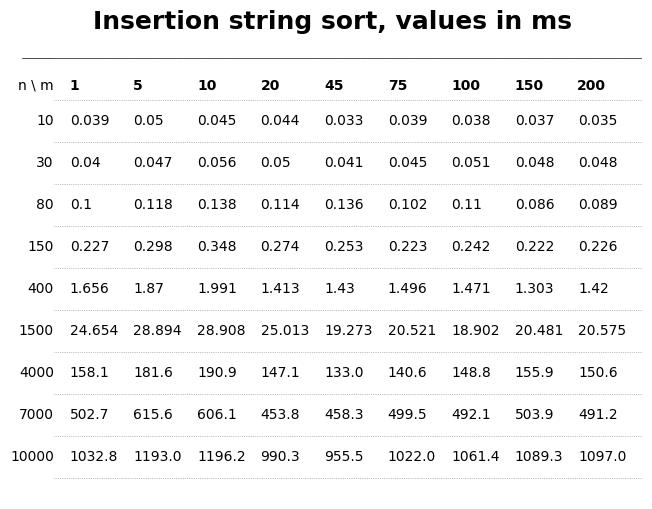

In [52]:
num_of_tests = [10, 30, 80, 150, 400, 1500, 4000, 7000, 10000]
length_of_str = [1, 5, 10, 20, 45, 75, 100, 150, 200]
m1 = [1000 * stringsort_data[x] for x in range(0, 9)]
m2 = [1000 * stringsort_data[x] for x in range(9, 18)]
m3 = [1000 * stringsort_data[x] for x in range(18, 27)]
m4 = [1000 * stringsort_data[x] for x in range(27, 36)]
m5 = [1000 * stringsort_data[x] for x in range(36, 45)]
m6 = [1000 * stringsort_data[x] for x in range(45, 54)]
m7 = [1000 * stringsort_data[x] for x in range(54, 63)]
m8 = [1000 * stringsort_data[x] for x in range(63, 72)]
m9 = [1000 * stringsort_data[x] for x in range(72, 81)]

fig, ax = plt.subplots(figsize=(8,6))
rows = 9
cols = 18
ax.set_ylim(-1, rows + 1)
ax.set_xlim(-1, cols + .5)
ax.set_title('Insertion string sort, values in ms', loc='center', fontsize=18, weight='bold')
ax.text(x=0, y=8.85, s='n \ m', va='center', ha='right')
for row in range(9):
    if row < 3 : ax.text(x=.5, y=row, s=round(m1[8 - row], 1), va='center', ha='left')
    else : ax.text(x=.5, y=row, s=round(m1[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=2.5, y=row, s=round(m2[8 - row], 1), va='center', ha='left')
    else : ax.text(x=2.5, y=row, s=round(m2[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=4.5, y=row, s=round(m3[8 - row], 1), va='center', ha='left')
    else : ax.text(x=4.5, y=row, s=round(m3[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=6.5, y=row, s=round(m4[8 - row], 1), va='center', ha='left')
    else : ax.text(x=6.5, y=row, s=round(m4[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=8.5, y=row, s=round(m5[8 - row], 1), va='center', ha='left')
    else : ax.text(x=8.5, y=row, s=round(m5[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=10.5, y=row, s=round(m6[8 - row], 1), va='center', ha='left')
    else : ax.text(x=10.5, y=row, s=round(m6[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=12.5, y=row, s=round(m7[8 - row], 1), va='center', ha='left')
    else : ax.text(x=12.5, y=row, s=round(m7[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=14.5, y=row, s=round(m8[8 - row], 1), va='center', ha='left')
    else : ax.text(x=14.5, y=row, s=round(m8[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=16.5, y=row, s=round(m9[8 - row], 1), va='center', ha='left')
    else : ax.text(x=16.5, y=row, s=round(m9[8 - row], 3), va='center', ha='left')
for row in range(9):
    ax.text(x=0, y=row, s=num_of_tests[8 - row], va='center', ha='right')
ax.text(.5, 8.75, 1, weight='bold', ha='left')
ax.text(2.5, 8.75, 5, weight='bold', ha='left')
ax.text(4.5, 8.75, 10, weight='bold', ha='left')
ax.text(6.5, 8.75, 20, weight='bold', ha='left')
ax.text(8.5, 8.75, 45, weight='bold', ha='left')
ax.text(10.5, 8.75, 75, weight='bold', ha='left')
ax.text(12.5, 8.75, 100, weight='bold', ha='left')
ax.text(14.5, 8.75, 150, weight='bold', ha='left')
ax.text(17.35, 8.75, 200, weight='bold', ha='right')
ax.axis('off')
ax.plot([-1, cols + 1], [9.5, 9.5], lw='.5', c='black')
for row in range(18):
    ax.plot([0, cols + 1], [row -.5, row - .5], ls=':', lw='.5', c='grey')

# Insertion String Sort With Binary Search

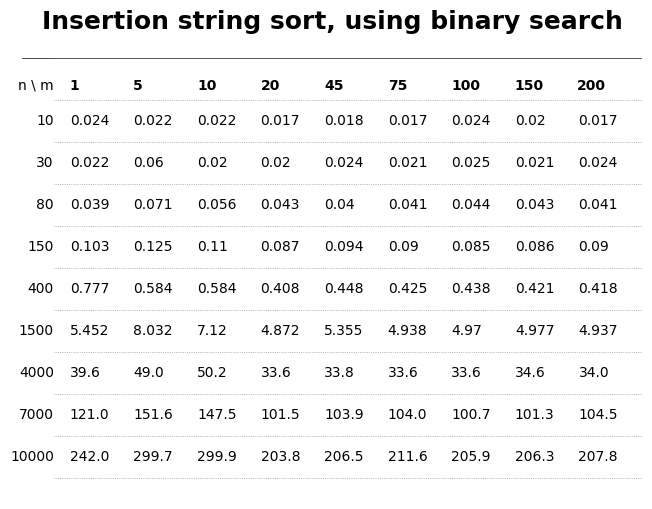

In [53]:
num_of_tests = [10, 30, 80, 150, 400, 1500, 4000, 7000, 10000]
length_of_str = [1, 5, 10, 20, 45, 75, 100, 150, 200]
m1 = [1000 * stringbinsort_data[x] for x in range(0, 9)]
m2 = [1000 * stringbinsort_data[x] for x in range(9, 18)]
m3 = [1000 * stringbinsort_data[x] for x in range(18, 27)]
m4 = [1000 * stringbinsort_data[x] for x in range(27, 36)]
m5 = [1000 * stringbinsort_data[x] for x in range(36, 45)]
m6 = [1000 * stringbinsort_data[x] for x in range(45, 54)]
m7 = [1000 * stringbinsort_data[x] for x in range(54, 63)]
m8 = [1000 * stringbinsort_data[x] for x in range(63, 72)]
m9 = [1000 * stringbinsort_data[x] for x in range(72, 81)]

fig, ax = plt.subplots(figsize=(8,6))
rows = 9
cols = 18
ax.set_ylim(-1, rows + 1)
ax.set_xlim(-1, cols + .5)
ax.set_title('Insertion string sort, using binary search', loc='center', fontsize=18, weight='bold')
ax.text(x=0, y=8.85, s='n \ m', va='center', ha='right')
for row in range(9):
    if row < 3 : ax.text(x=.5, y=row, s=round(m1[8 - row], 1), va='center', ha='left')
    else : ax.text(x=.5, y=row, s=round(m1[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=2.5, y=row, s=round(m2[8 - row], 1), va='center', ha='left')
    else : ax.text(x=2.5, y=row, s=round(m2[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=4.5, y=row, s=round(m3[8 - row], 1), va='center', ha='left')
    else : ax.text(x=4.5, y=row, s=round(m3[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=6.5, y=row, s=round(m4[8 - row], 1), va='center', ha='left')
    else : ax.text(x=6.5, y=row, s=round(m4[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=8.5, y=row, s=round(m5[8 - row], 1), va='center', ha='left')
    else : ax.text(x=8.5, y=row, s=round(m5[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=10.5, y=row, s=round(m6[8 - row], 1), va='center', ha='left')
    else : ax.text(x=10.5, y=row, s=round(m6[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=12.5, y=row, s=round(m7[8 - row], 1), va='center', ha='left')
    else : ax.text(x=12.5, y=row, s=round(m7[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=14.5, y=row, s=round(m8[8 - row], 1), va='center', ha='left')
    else : ax.text(x=14.5, y=row, s=round(m8[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=16.5, y=row, s=round(m9[8 - row], 1), va='center', ha='left')
    else : ax.text(x=16.5, y=row, s=round(m9[8 - row], 3), va='center', ha='left')
for row in range(9):
    ax.text(x=0, y=row, s=num_of_tests[8 - row], va='center', ha='right')
ax.text(.5, 8.75, 1, weight='bold', ha='left')
ax.text(2.5, 8.75, 5, weight='bold', ha='left')
ax.text(4.5, 8.75, 10, weight='bold', ha='left')
ax.text(6.5, 8.75, 20, weight='bold', ha='left')
ax.text(8.5, 8.75, 45, weight='bold', ha='left')
ax.text(10.5, 8.75, 75, weight='bold', ha='left')
ax.text(12.5, 8.75, 100, weight='bold', ha='left')
ax.text(14.5, 8.75, 150, weight='bold', ha='left')
ax.text(17.35, 8.75, 200, weight='bold', ha='right')
ax.axis('off')
ax.plot([-1, cols + 1], [9.5, 9.5], lw='.5', c='black')
for row in range(18):
    ax.plot([0, cols + 1], [row -.5, row - .5], ls=':', lw='.5', c='grey')

# How Faster With Binary Search

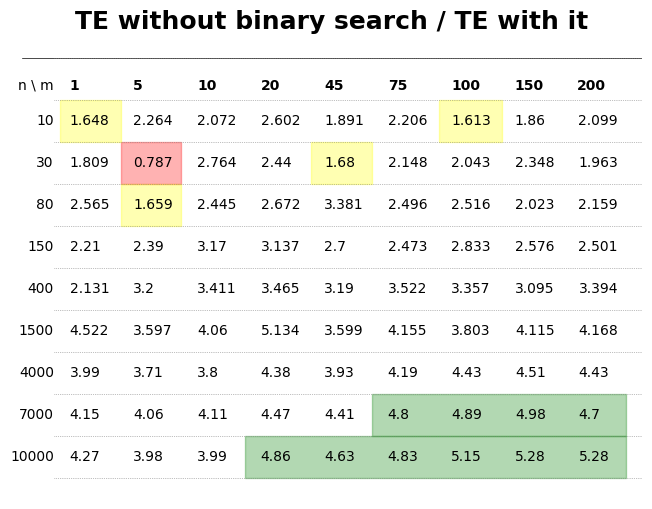

In [54]:
num_of_tests = [10, 30, 80, 150, 400, 1500, 4000, 7000, 10000]
length_of_str = [1, 5, 10, 20, 45, 75, 100, 150, 200]
m1 = [stringsort_data[x] / stringbinsort_data[x] for x in range(0, 9)]
m2 = [stringsort_data[x] / stringbinsort_data[x] for x in range(9, 18)]
m3 = [stringsort_data[x] / stringbinsort_data[x] for x in range(18, 27)]
m4 = [stringsort_data[x] / stringbinsort_data[x] for x in range(27, 36)]
m5 = [stringsort_data[x] / stringbinsort_data[x] for x in range(36, 45)]
m6 = [stringsort_data[x] / stringbinsort_data[x] for x in range(45, 54)]
m7 = [stringsort_data[x] / stringbinsort_data[x] for x in range(54, 63)]
m8 = [stringsort_data[x] / stringbinsort_data[x] for x in range(63, 72)]
m9 = [stringsort_data[x] / stringbinsort_data[x] for x in range(72, 81)]

fig, ax = plt.subplots(figsize=(8,6))
rows = 9
cols = 18
ax.set_ylim(-1, rows + 1)
ax.set_xlim(-1, cols + .5)
ax.set_title('TE without binary search / TE with it', loc='center', fontsize=18, weight='bold')
ax.text(x=0, y=8.85, s='n \ m', va='center', ha='right')
for row in range(9):
    if row < 3 : ax.text(x=.5, y=row, s=round(m1[8 - row], 2), va='center', ha='left')
    else : ax.text(x=.5, y=row, s=round(m1[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=2.5, y=row, s=round(m2[8 - row], 2), va='center', ha='left')
    else : ax.text(x=2.5, y=row, s=round(m2[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=4.5, y=row, s=round(m3[8 - row], 2), va='center', ha='left')
    else : ax.text(x=4.5, y=row, s=round(m3[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=6.5, y=row, s=round(m4[8 - row], 2), va='center', ha='left')
    else : ax.text(x=6.5, y=row, s=round(m4[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=8.5, y=row, s=round(m5[8 - row], 2), va='center', ha='left')
    else : ax.text(x=8.5, y=row, s=round(m5[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=10.5, y=row, s=round(m6[8 - row], 2), va='center', ha='left')
    else : ax.text(x=10.5, y=row, s=round(m6[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=12.5, y=row, s=round(m7[8 - row], 2), va='center', ha='left')
    else : ax.text(x=12.5, y=row, s=round(m7[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=14.5, y=row, s=round(m8[8 - row], 2), va='center', ha='left')
    else : ax.text(x=14.5, y=row, s=round(m8[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=16.5, y=row, s=round(m9[8 - row], 2), va='center', ha='left')
    else : ax.text(x=16.5, y=row, s=round(m9[8 - row], 3), va='center', ha='left')
for row in range(9):
    ax.text(x=0, y=row, s=num_of_tests[8 - row], va='center', ha='right')
ax.text(.5, 8.75, 1, weight='bold', ha='left')
ax.text(2.5, 8.75, 5, weight='bold', ha='left')
ax.text(4.5, 8.75, 10, weight='bold', ha='left')
ax.text(6.5, 8.75, 20, weight='bold', ha='left')
ax.text(8.5, 8.75, 45, weight='bold', ha='left')
ax.text(10.5, 8.75, 75, weight='bold', ha='left')
ax.text(12.5, 8.75, 100, weight='bold', ha='left')
ax.text(14.5, 8.75, 150, weight='bold', ha='left')
ax.text(17.35, 8.75, 200, weight='bold', ha='right')
ax.axis('off')
ax.plot([-1, cols + 1], [9.5, 9.5], lw='.5', c='black')
for row in range(18):
    ax.plot([0, cols + 1], [row -.5, row - .5], ls=':', lw='.5', c='grey')

ax.fill_between([6, 18], -0.5, 0.5, color='green', alpha=0.3)
ax.fill_between([10, 18], 0.5, 1.5, color='green', alpha=0.3)
ax.fill_between([2.1, 4], 6.5, 7.5, color='red', alpha=0.3)
ax.fill_between([2.1, 4], 5.5, 6.5, color='yellow', alpha=0.3)
ax.fill_between([8.1, 10], 6.5, 7.5, color='yellow', alpha=0.3)
ax.fill_between([0.2, 2.1], 7.5, 8.5, color='yellow', alpha=0.3)
ax.fill_between([12.1, 14.1], 7.5, 8.5, color='yellow', alpha=0.3)